## 00. PyTorch Fundamentals

Notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/


In [38]:
%pip install torch torchvision torchaudio pandas numpy matplotlib;


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print(f"Torch version: {torch.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

# Check if GPU is available
print(f"GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device name: {torch.cuda.get_device_name()}")
    print(f"GPU device count: {torch.cuda.device_count()}")

Torch version: 2.1.1
Pandas version: 2.1.3
Numpy version: 1.26.2
GPU available: False


## Introduction to Tensors

### Creating Tensors


In [40]:
# Scalar
scalar = torch.tensor(3.7)

print(f"{scalar} is a {type(scalar)}")
print(f"Scalar shape: {scalar.shape}")
print(f"Scalar is a tensor of rank: {scalar.ndim}")
print(f"Use .item() to get the value of a scalar as a Python number: {scalar.item()}")

3.700000047683716 is a <class 'torch.Tensor'>
Scalar shape: torch.Size([])
Scalar is a tensor of rank: 0
Use .item() to get the value of a scalar as a Python number: 3.700000047683716


### Vector


In [41]:
# vector
vector = torch.tensor([1, 2, 3, 4, 5])

print(f"{vector} is a {type(vector)}")
print(f"Vector shape: {vector.shape}")
print(f"Vector is a tensor of rank: {vector.ndim}")

tensor([1, 2, 3, 4, 5]) is a <class 'torch.Tensor'>
Vector shape: torch.Size([5])
Vector is a tensor of rank: 1


### Matrix


In [42]:
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])

print(f"{matrix} is a {type(matrix)}")
print(f"Matrix shape: {matrix.shape}")
print(f"Matrix is a tensor of rank: {matrix.ndim}")
print(
    f"matrix[0] extracts the first row: {matrix[0]} and is a tensor of rank: {matrix[0].ndim}"
)

tensor([[1, 2, 3],
        [4, 5, 6]]) is a <class 'torch.Tensor'>
Matrix shape: torch.Size([2, 3])
Matrix is a tensor of rank: 2
matrix[0] extracts the first row: tensor([1, 2, 3]) and is a tensor of rank: 1


### Random, Zeros and Ones Tensors


In [43]:
X1 = torch.rand(3, 4)  # Random matrix of shape (3,4)
X2 = torch.zeros(3, 4)  # Zero matrix of shape (3,4)
X3 = torch.ones(2, 2)  # Ones matrix of shape (3,4)
X4 = torch.eye(2)  # Identity matrix of shape (3,3)

print(f"Random matrix:\n {X1}")
print(f"Zero matrix:\n {X2}")
print(f"Ones matrix:\n {X3}")
print(f"Identity matrix:\n {X4}")

Random matrix:
 tensor([[0.1299, 0.2960, 0.9996, 0.0361],
        [0.6241, 0.7987, 0.9557, 0.1947],
        [0.4878, 0.2237, 0.3888, 0.9679]])
Zero matrix:
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
Ones matrix:
 tensor([[1., 1.],
        [1., 1.]])
Identity matrix:
 tensor([[1., 0.],
        [0., 1.]])


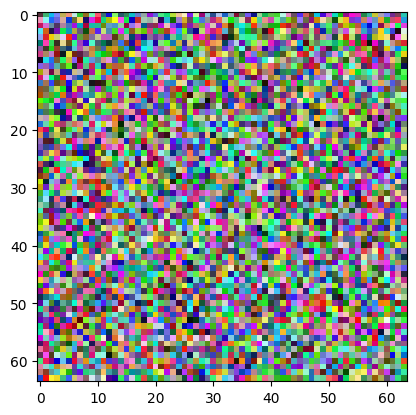

In [44]:
# Images are represented as 3D tensors of shape (channels, height, width)
# 3 channels (RGB), 64x64 pixels
image = torch.rand(3, 64, 64)

# Matplotlib expects the color channel to be the last dimension
# 1,2,0 means 0th position gets the value from 1st dimension,
# 1st position gets the value from 2nd dimension etc
permuted = image.permute(1, 2, 0)
plt.imshow(permuted)

### Create a range of tensors and tensors-like


In [45]:
# Range of values in a tensor
one_to_ten = torch.arange(0, 10)
print(f"one_to_ten: {one_to_ten}")
print(f"Rank: {one_to_ten.ndim}")

one_to_ten: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Rank: 1


In [46]:
# Tensor like
# Creates a tensor of the same shape as the input tensor
ten_zeros = torch.zeros_like(one_to_ten)

print(f"ten_zeros: {ten_zeros}")

ten_zeros: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Tensor Data Types

Lower precision types are useful when training models that are not memory bound. For example, if the model is bound by computation, then it can be more efficient to use 16-bit floats instead of 32-bit floats. This is because 16-bit floats take up half as much space, so we can store twice as many of them in the same memory. It can make computations faster since we can process twice as many floats at once.

_Common Issues encountered when working with tensors in DL with PyTorch_

1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on right device


In [47]:
# The device where the tensor is stored
# Defaults to cpu, but we can specify cuda or mps (Apple Silicon)
# when they are available
device = "cpu"
if torch.backends.mps.is_available():
    device = "mps"
if torch.cuda.is_available():
    device = "cuda"

# Create a tensor on the specified device with the specified dtype
# requires_grad means we want to track gradients for computations on this tensor
float_32_tensor = torch.tensor(
    [1, 2, 3], dtype=torch.float32, device=device, requires_grad=False
)
float_16_tensor = torch.tensor(
    [1, 2, 3], dtype=torch.float16, device=device, requires_grad=False
)

print(f"float_32_tensor: {float_32_tensor}")
print(f"float_16_tensor: {float_16_tensor}")

float_32_tensor: tensor([1., 2., 3.], device='mps:0')
float_16_tensor: tensor([1., 2., 3.], device='mps:0', dtype=torch.float16)


### Getting information from tensors

In [48]:
X = torch.rand(3, 4, device=device, dtype=torch.float16)
print(f"X: {X}")
print(f"X shape: {X.shape}")  # os use X.size()
print(f"X rank: {X.ndim}")
print(f"X dtype: {X.dtype}")
print(f"X device: {X.device}")

X: tensor([[0.3975, 0.9951, 0.5664, 0.6201],
        [0.0029, 0.9189, 0.9453, 0.7393],
        [0.9375, 0.9941, 0.0371, 0.8896]], device='mps:0', dtype=torch.float16)
X shape: torch.Size([3, 4])
X rank: 2
X dtype: torch.float16
X device: mps:0


## Tensor Operations

These include:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix Multiplication (dot product)

In [49]:
T1 = torch.tensor([1, 2, 3])

# Add 10 to everything
T2 = T1 + 10  # or T1.add(10)
print(f"T2: {T2}")

# Multiply everything by 10
T3 = T1 * 10  # or T1.mul(10)
print(f"T3: {T3}")

# Subtract 10 from everything
T4 = T1 - 10  # or T1.sub(10)
print(f"T4: {T4}")

# Divide everything by 10
T5 = T1 / 10  # or T1.div(10)
print(f"T5: {T5}")

# Matrix multiplication
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
B = torch.tensor([[7, 8], [9, 10], [11, 12]])
C = A @ B  # or torch.matmul(A,B) or torch.mm(A,B)
print(f"C: {C}")

# Element-wise multiplication
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
B = torch.ones_like(A) * 10
D = A * B
print(f"D: {D}")

T2: tensor([11, 12, 13])
T3: tensor([10, 20, 30])
T4: tensor([-9, -8, -7])
T5: tensor([0.1000, 0.2000, 0.3000])
C: tensor([[ 58,  64],
        [139, 154]])
D: tensor([[10, 20, 30],
        [40, 50, 60]])


### Transpose

In [50]:
# Transpose
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
At = A.T

print(f"A: {A} with shape: {A.shape}")
print(f"At: {At} with shape {At.shape}")

A: tensor([[1, 2, 3],
        [4, 5, 6]]) with shape: torch.Size([2, 3])
At: tensor([[1, 4],
        [2, 5],
        [3, 6]]) with shape torch.Size([3, 2])


### Agrregation (Sum, Mean, Max, Min, etc)

In [51]:
T = torch.arange(0, 100, 10)

print(f"Min: {T.min()}")  # or torch.min(T)
print(f"Idx of min: {T.argmin()}")  # or torch.argmin(T)
print(f"Max: {T.max()}")  # or torch.max(T)
print(f"Idx of max: {T.argmax()}")  # or torch.argmax(T)
print(
    f"Mean: {torch.mean(T.type(torch.float32))}"
)  # Requires float input so we convert it
print(f"Sum of all elements: {torch.sum(T)}")  # or T.sum()

Min: 0
Idx of min: 0
Max: 90
Idx of max: 9
Mean: 45.0
Sum of all elements: 450


## Reshaping, Stacking and Squeezing

* Reshaping - Changing the shape of a tensor (number of elements remains the same)
* View - Return a view of a tensor. It is a different way of looking at the same data. Shares memory with the original tensor.
* Stacking - Join a sequence of tensors along a new dimension.
* Squeezing - Remove single-dimensional entries from the shape of a tensor. Returns a tensor with the same data as the input tensor but with fewer dimensions.
* Unsqueeze - Add a dimension of 1 to the shape of a tensor. Returns a new tensor with a dimension of size one inserted at the specified position.
* Permutation - Permute the dimensions of a tensor.

In [52]:
T = torch.arange(0, 10)
print(f"Tensor: {T}")
print(f"Tensor shape: {T.shape}")

# Reshape to (1,10)
T_reshaped = T.reshape(5, 2)
print(f"Reshaped tensor: {T_reshaped}")

# View
T_view = T.view(10, 1)  # similar to reshape but it doesn't copy the data.
print(f"Viewed tensor: {T_view}")
# changing the view will change the original tensor
T_view[0] = 100
print(f"Original tensor: {T}")

Tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Tensor shape: torch.Size([10])
Reshaped tensor: tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])
Viewed tensor: tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])
Original tensor: tensor([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])


In [53]:
# Stack
A = torch.tensor([1, 2, 3])
B = torch.tensor([4, 5, 6])
C = torch.tensor([7, 8, 9])

D = torch.stack([A, B, C])
E = torch.stack([A, B, C], dim=1)
print(f"Stacked tensor: {D}")
print(f"Stacked tensor: {E}")

Stacked tensor: tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Stacked tensor: tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])


In [54]:
# Squeeze
T = torch.tensor([[[[1, 2, 3], [4, 5, 6]]]])
print(f"Tensor: {T}")
print(f"Tensor shape: {T.shape}")

T_squeezed = T.squeeze()
print(f"Squeezed tensor: {T_squeezed}")
print(f"Squeezed tensor shape: {T_squeezed.shape}")

Tensor: tensor([[[[1, 2, 3],
          [4, 5, 6]]]])
Tensor shape: torch.Size([1, 1, 2, 3])
Squeezed tensor: tensor([[1, 2, 3],
        [4, 5, 6]])
Squeezed tensor shape: torch.Size([2, 3])


In [55]:
# Unsqueeze
T_unsqueezed = T_squeezed.unsqueeze(dim=1)
print(f"Unsqueezed tensor: {T_unsqueezed}")
print(f"Unsqueezed tensor shape: {T_unsqueezed.shape}")

Unsqueezed tensor: tensor([[[1, 2, 3]],

        [[4, 5, 6]]])
Unsqueezed tensor shape: torch.Size([2, 1, 3])


## PyTorch and NumPy

In [56]:
# Convert to numpy
T = torch.tensor([1, 2, 3])
T_numpy = T.numpy()  # Copies the data

print(f"Tensor: {T}")
print(f"Tensor shape: {T.shape}")
print(f"Tensor type: {type(T)}")

print(f"Numpy: {T_numpy}")
print(f"Numpy shape: {T_numpy.shape}")
print(f"Numpy type: {type(T_numpy)}")

Tensor: tensor([1, 2, 3])
Tensor shape: torch.Size([3])
Tensor type: <class 'torch.Tensor'>
Numpy: [1 2 3]
Numpy shape: (3,)
Numpy type: <class 'numpy.ndarray'>


In [57]:
# Convert to tensor
T = torch.from_numpy(T_numpy)  # Copies the data
print(f"Tensor: {T}")
print(f"Tensor shape: {T.shape}")
print(f"Tensor type: {type(T)}")

Tensor: tensor([1, 2, 3])
Tensor shape: torch.Size([3])
Tensor type: <class 'torch.Tensor'>


## Reproducibility

In [67]:
# Set random seed

seed = 42
torch.manual_seed(seed)
# gpu random seed
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

# Create a random tensor
T = torch.rand(3, 4)
print(f"Tensor: {T}")

Tensor: tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])


## GPU Support

In [65]:
# Use device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else device  # for Apple Silicon

# Create a random tensor on the specified device
T = torch.rand(3, 4)  # default device is cpu
T = T.to(device)  # move to device
print(f"Tensor: {T}")

# Tensors cant be converted to numpy if they are on the gpu
try:
    T_np = T.numpy()  # Move tensor to numpy
except Exception as e:
    pass

# Move tensor to cpu first instead
T = T.cpu().numpy()
print(f"Tensor: {T}")

Tensor: tensor([[0.9811, 0.0874, 0.0041, 0.1088],
        [0.1637, 0.7025, 0.6790, 0.9155],
        [0.2418, 0.1591, 0.7653, 0.2979]], device='mps:0')
Tensor: [[0.98112535 0.08736187 0.00406194 0.10881811]
 [0.16365546 0.7025201  0.6790379  0.9154622 ]
 [0.24178731 0.1591441  0.76528907 0.29789776]]
